<a href="https://colab.research.google.com/github/mushfiq-shanto/glassdoor-bangladesh-software-engineer-salaries-webscraping/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path ='/content/drive/MyDrive/MasterCourse/Capstone #1/Software Engineer Salaries in Bangladesh.csv'
df = pd.read_csv(file_path)

df.head()


,Company,Entries,Rating,Median Salary,Upper Range,Lower Range,Salary Interval
0,Enosis Solutions (Bangladesh),212,4.2,50000.0,54000.0,45000.0,/ mo
1,BJIT,164,3.5,40000.0,50000.0,30000.0,/ mo
2,Brain Station-23,145,4.1,63167.0,76000.0,51000.0,/ mo
3,Samsung R&D Institute Bangladesh,139,3.7,53000.0,62000.0,45000.0,/ mo
4,Secure Link Services,98,3.8,58333.0,84000.0,40000.0,/ mo


In [ ]:
df.info()
print('\n')

print("Unique Companies:", df['Company'].nunique())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          217 non-null    object 
 1   Entries          217 non-null    int64  
 2   Rating           217 non-null    float64
 3   Median Salary    217 non-null    float64
 4   Upper Range      217 non-null    float64
 5   Lower Range      217 non-null    float64
 6   Salary Interval  217 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 12.0+ KB


Unique Companies: 208


,0
Company,0
Entries,0
Rating,0
Median Salary,0
Upper Range,0
Lower Range,0
Salary Interval,0


In [ ]:
# Identify duplicates and sort them alphabetically
duplicates = df[df.duplicated(['Company'], keep=False)].sort_values('Company')

# Merge the data
df = df.groupby('Company').agg({
    'Entries': 'sum',
    'Rating': 'mean',
    'Median Salary': lambda x: x[df.loc[x.index, 'Entries'].idxmax()],
    'Upper Range': 'mean',
    'Lower Range': 'mean',
    'Salary Interval': 'first'
}).reset_index()

# Display results
print("Duplicate Entries:")
display(duplicates)
print("\nMerged DataFrame:")
df.head()


Duplicate Entries:


,Company,Entries,Rating,Median Salary,Upper Range,Lower Range,Salary Interval
1,BJIT,164,3.5,40000.0,50000.0,30000.0,/ mo
179,BJIT,2,3.5,10000.0,10000.0,10000.0,/ mo
16,BRAC IT Services,30,3.9,41833.0,53000.0,29000.0,/ mo
184,BRAC IT Services,2,3.9,9000.0,10000.0,8000.0,/ mo
2,Brain Station-23,145,4.1,63167.0,76000.0,51000.0,/ mo
116,Brain Station-23,5,4.1,10000.0,27000.0,10000.0,/ mo
53,Daraz,8,3.8,38750.0,101000.0,26000.0,/ mo
56,Daraz,7,3.5,59167.0,80000.0,26000.0,/ mo
161,ERA-InfoTech,2,3.2,10000.0,10000.0,10000.0,/ mo
26,ERA-InfoTech,11,3.2,40000.0,50000.0,20000.0,/ mo



Merged DataFrame:


,Company,Entries,Rating,Median Salary,Upper Range,Lower Range,Salary Interval
0,10 Minute School,5,4.1,25000.0,90000.0,25000.0,/ mo
1,6amTech,4,4.4,45417.0,100000.0,28000.0,/ mo
2,ABC,9,3.9,40000.0,55000.0,16000.0,/ mo
3,ADN Telecom,2,2.9,55000.0,60000.0,50000.0,/ mo
4,AITS Idea,3,2.4,15000.0,35000.0,8000.0,/ mo


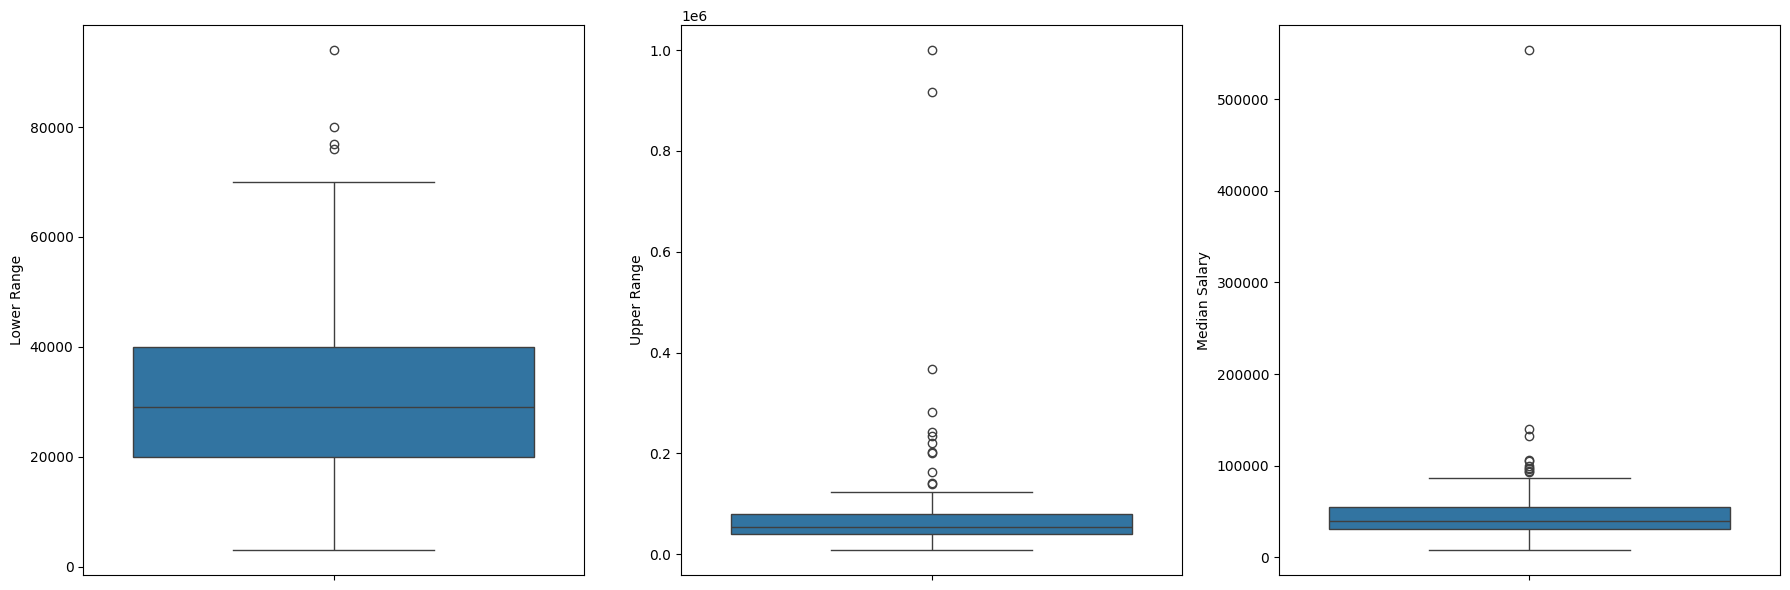

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(nrows = 1, ncols = 3, figsize = (18, 6))

plt.subplot(1,3,1)
sns.boxplot(y=df['Lower Range'])

plt.subplot(1,3,2)
sns.boxplot(y=df['Upper Range'])

plt.subplot(1,3,3)
sns.boxplot(y=df['Median Salary'])

plt.tight_layout()
plt.show()


**Note**: All three measures have significant number of outliers that far exceed the upper threshold. These values likely skew the data to make it less reflective of actual market scenario. While not being excluded, these outliers will be in consideration when visualizations will be prepared.

In [ ]:
Q1 = df[['Upper Range','Lower Range','Median Salary']].quantile(0.25)
Q3 = df[['Upper Range','Lower Range','Median Salary']].quantile(0.75)
IQR = Q3 - Q1

upper_threshold = Q3 + 1.5 * IQR
lower_threshold = Q1 - 1.5 * IQR

print("Upper Threshold:\n", upper_threshold)
print('\n')
print("Lower Threshold:\n", lower_threshold)

Upper Threshold:
 Upper Range      138500.000
Lower Range       70000.000
Median Salary     92619.375
dtype: float64


Lower Threshold:
 Upper Range     -17500.000
Lower Range     -10000.000
Median Salary    -6171.625
dtype: float64


In [ ]:
df.to_csv('/content/drive/MyDrive/MasterCourse/Capstone #1/Software Engineer Salaries in Bangladesh (Cleaned).csv',index=False)